# Clustering

## Hierachical clustering

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
print(iris_data_pd)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


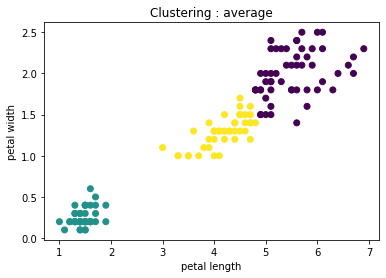

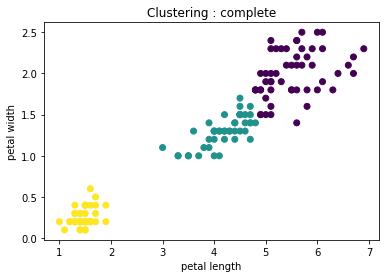

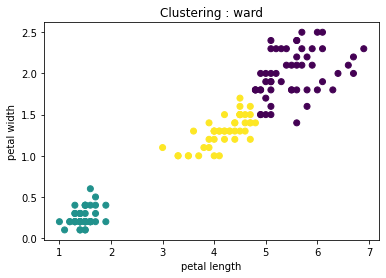

In [6]:
from sklearn.cluster import AgglomerativeClustering

linkage = {"complete", "average", "ward"}
for idx, i in enumerate(linkage):
  plt.figure(idx)
  hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=i)
  hier.fit(iris_data_pd.iloc[:, 2:4])
  plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=hier.labels_)
  plt.title("Clustering : " +i)
  plt.xlabel('petal length')
  plt.ylabel('petal width')
plt.show()


어떻게 트리를 그렸는지 확인해보기 위해 scipy(clustering 하고 tree 그림) 패키지 사용

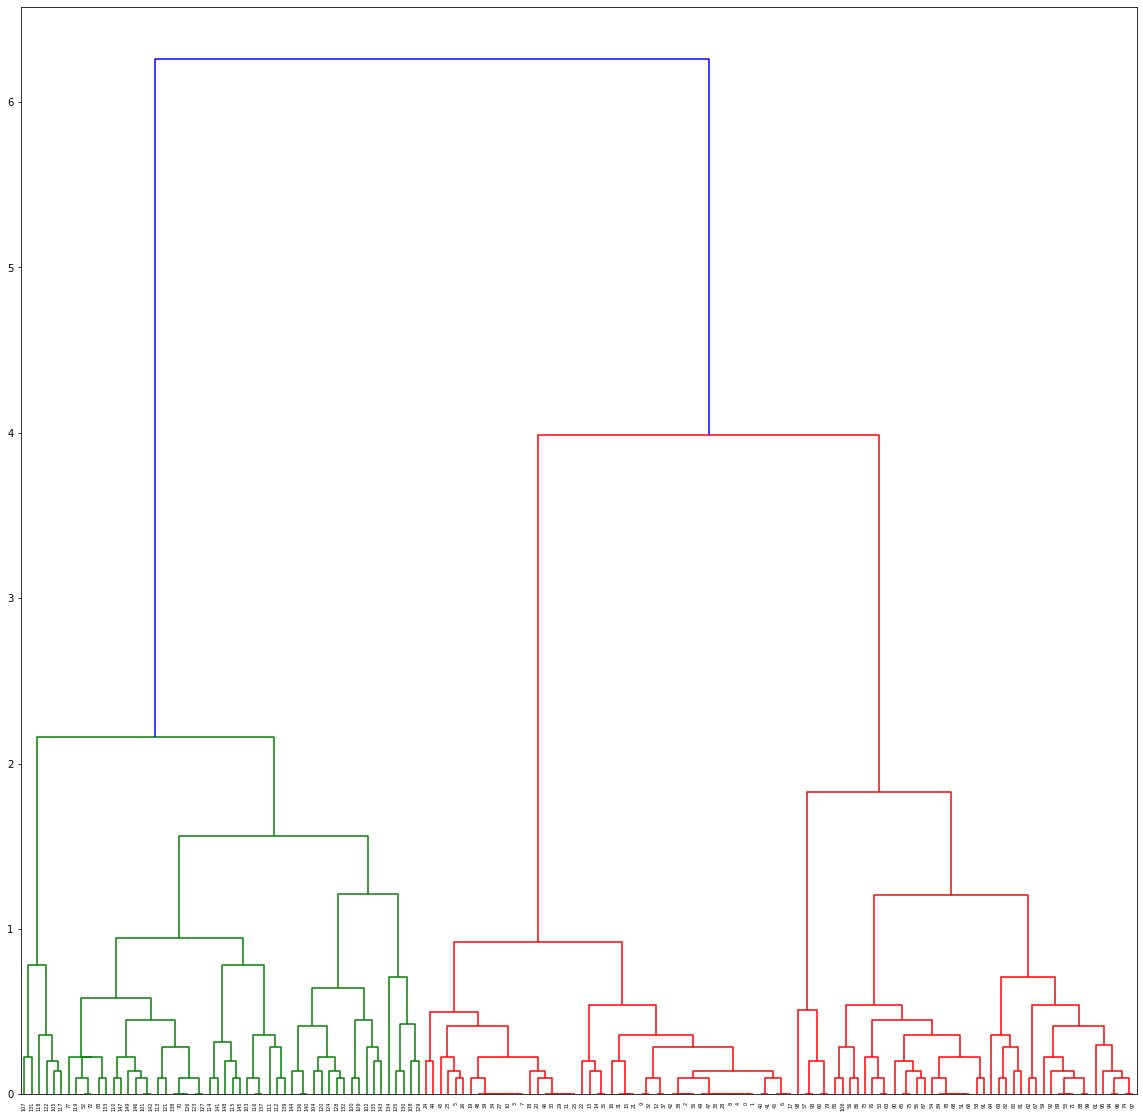

In [9]:
from scipy.cluster import hierarchy

hierar = hierarchy.linkage(iris_data_pd.iloc[:, 2:4], 'complete')
plt.figure(figsize=(20,20))
dn = hierarchy.dendrogram(hierar)

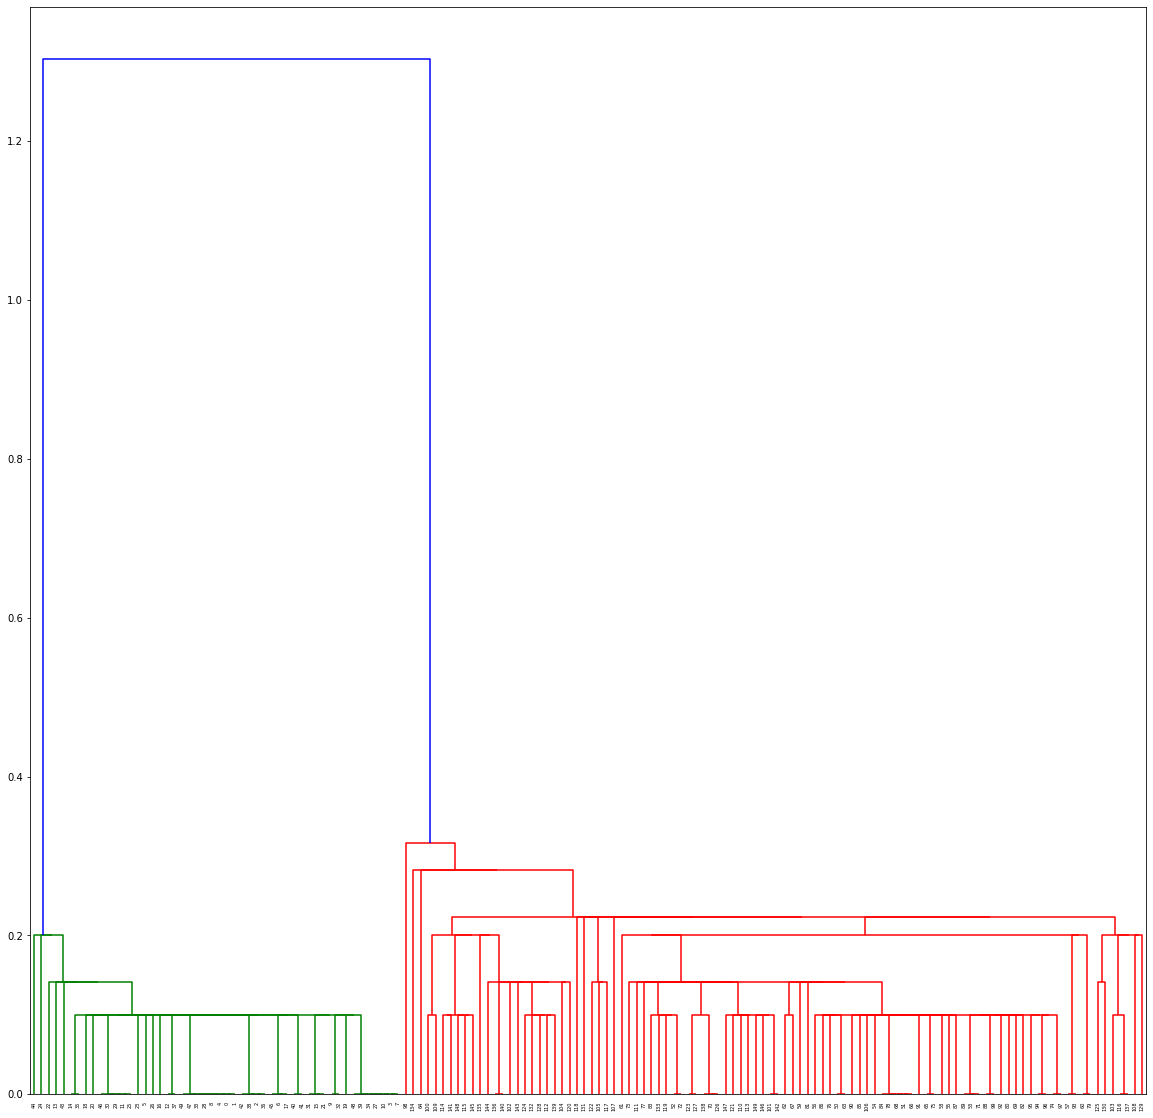

In [14]:
hierar = hierarchy.linkage(iris_data_pd.iloc[:, 2:4], 'single')
plt.figure(figsize=(20,20))
dn = hierarchy.dendrogram(hierar)

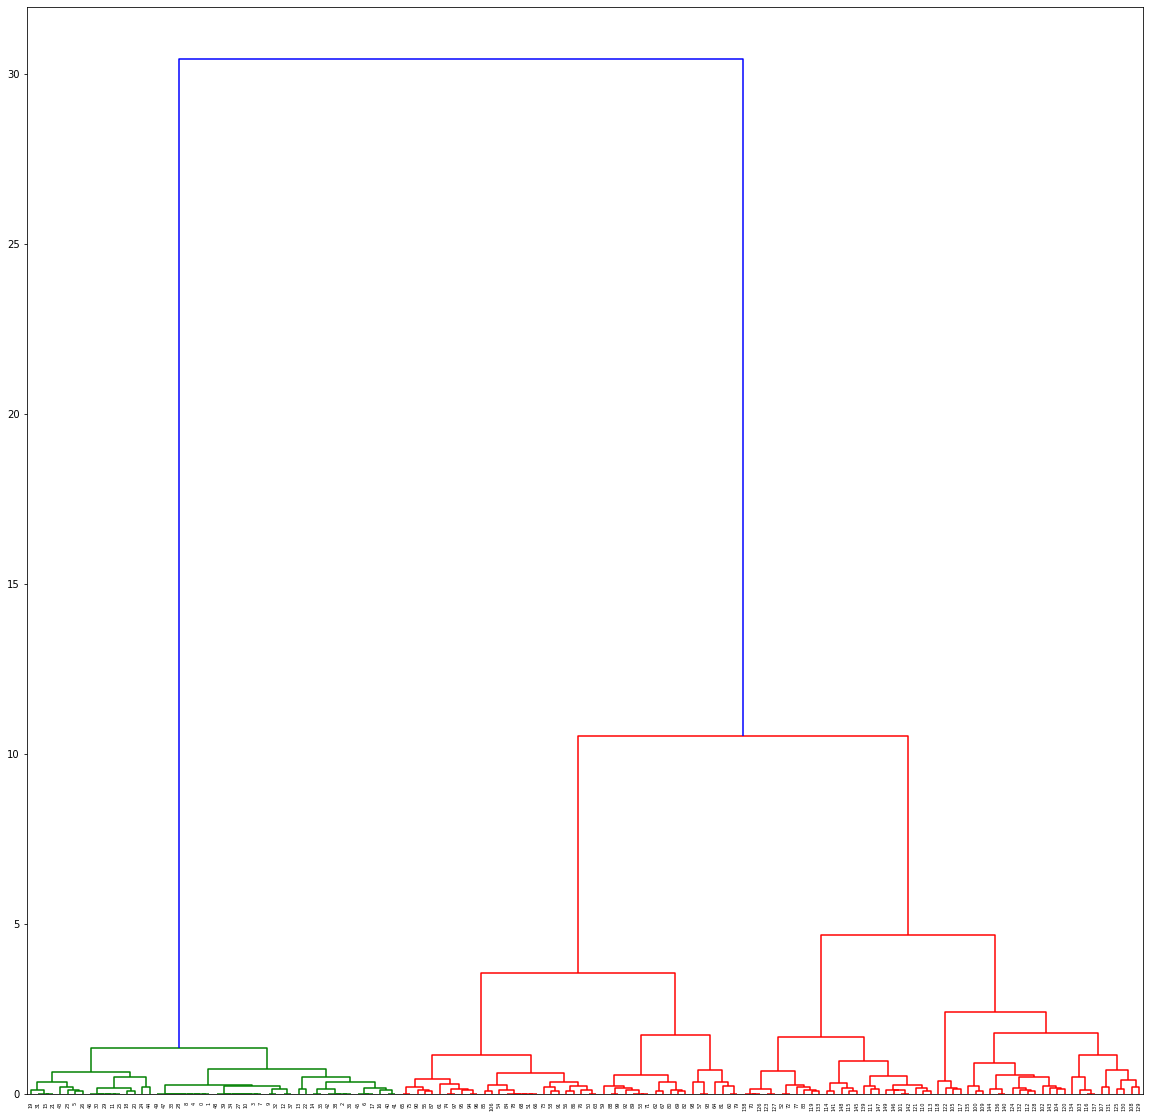

In [13]:
hierar = hierarchy.linkage(iris_data_pd.iloc[:, 2:4], 'ward')
plt.figure(figsize=(20,20))
dn = hierarchy.dendrogram(hierar)

## Density Clustering

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [17]:
data = pd.read_csv(filename)
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
from sklearn.preprocessing import normalize

data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns =data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


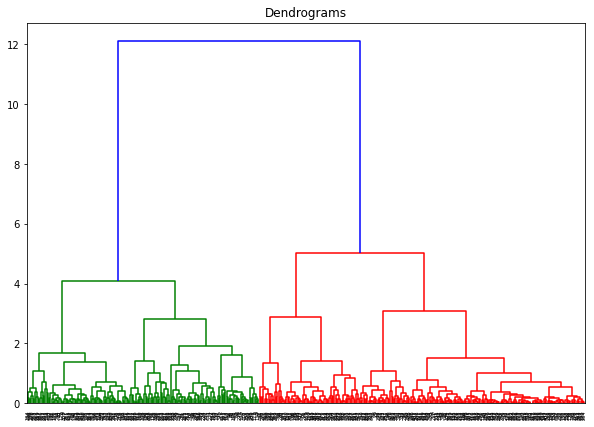

In [19]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

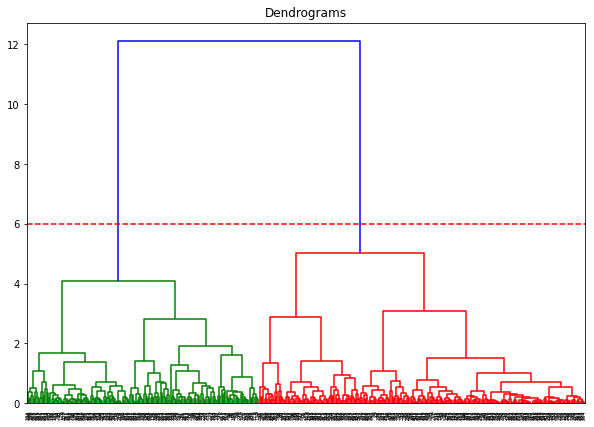

In [20]:
plt.figure(figsize=(10,7))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle="--")

In [21]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

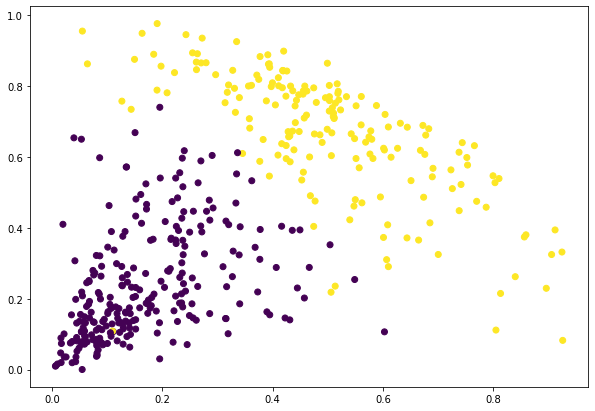

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=clusters.labels_)

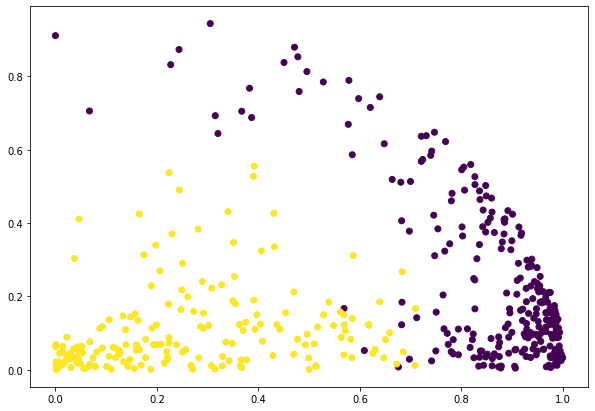

In [25]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Fresh'], data_scaled['Frozen'], c=clusters.labels_)

## DBSCAN

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns = iris.feature_names)
print(iris_data_pd)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


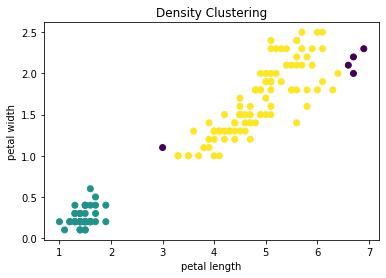

In [5]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.5, min_samples=10)
db.fit(iris_data_pd.iloc[:,2:4])

y_pred = db.fit_predict(iris_data_pd.iloc[:, 2:4])
plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
plt.title("Density Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [6]:
db.labels_


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


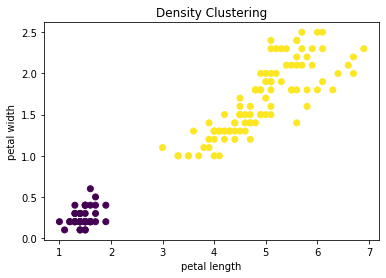

In [7]:
db.set_params(eps = 0.5, min_samples = 5)
y_pred = db.fit_predict(iris_data_pd.iloc[:,2:4])
print(db.labels_)
plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
plt.title("Density Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

[ 0  0  0  1  0 -1  0  1  0  1  1 -1  0 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1
 -1 -1 -1  1  0 -1 -1 -1  1  0  1 -1  0  0  0  1  0  0  0 -1 -1  0 -1  0
  1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


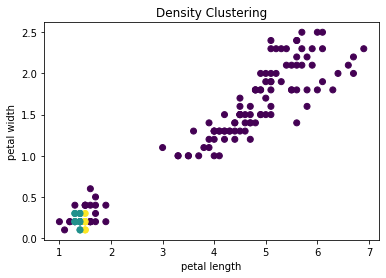

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


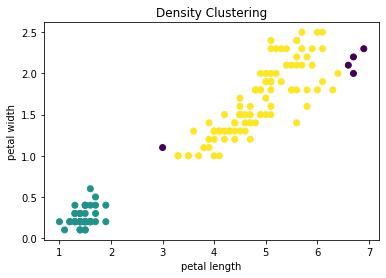

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


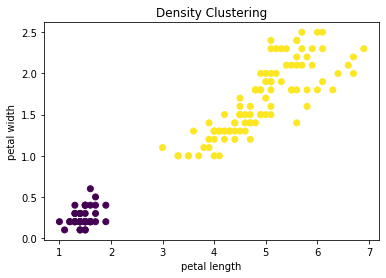

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


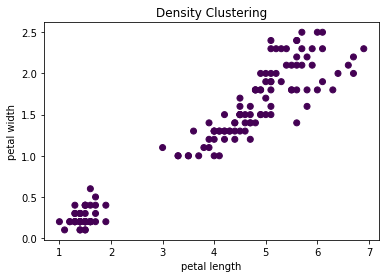

In [8]:
eps = [0.1, 0.5, 1.0, 1.5]
for idx, i in enumerate(eps):
  plt.figure(idx)
  db.set_params(eps=i, min_samples=10)
  y_pred = db.fit_predict(iris_data_pd.iloc[:,2:4])
  print(db.labels_)
  plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
  plt.title("Density Clustering")
  plt.xlabel('petal length')
  plt.ylabel('petal width')
  plt.show()

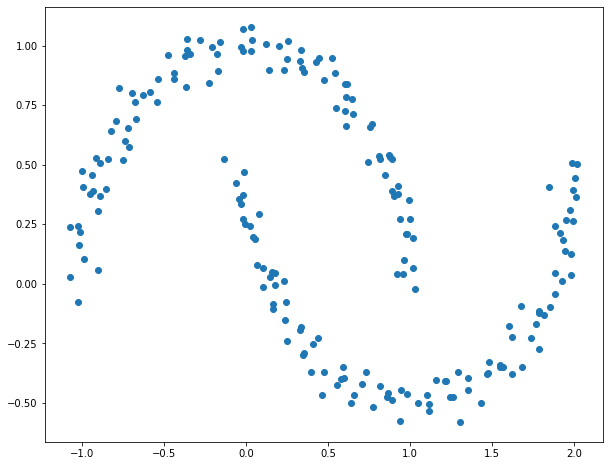

In [11]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(200, noise=0.05, random_state=0)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

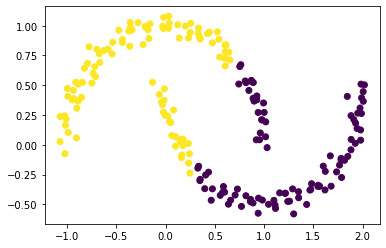

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

D_labels = KMeans(2).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=D_labels, cmap='viridis')

In [13]:
from sklearn.cluster import DBSCAN

D_labels = DBSCAN(eps=0)

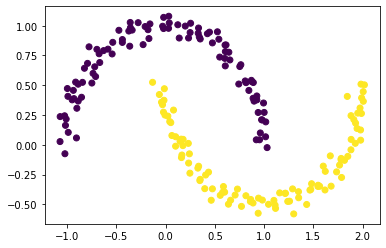

In [14]:
D_labels = DBSCAN(eps=0.3, min_samples=15).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=D_labels, cmap='viridis')

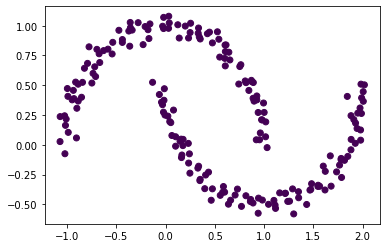

In [15]:
D_labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=D_labels, cmap='viridis')

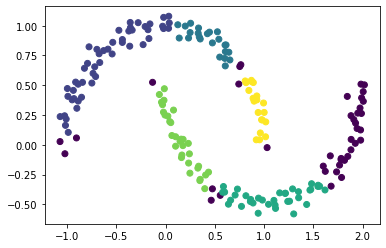

In [30]:
D_labels = DBSCAN(eps=0.3, min_samples=20).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=D_labels, cmap='viridis')

In [17]:
D_labels

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [23]:
import pandas as pd
import math
import matplotlib

In [ ]:
np.random.seed(42)

def PointsInCircum(r, n=100):
  return [(math.cos(2*math.pi/n*x)*r + np.random.normal(-30,30), math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30), math.sin(2*math.pi/n*x)*r+np.random.normal)]

In [ ]:
df = pd.DataFrame(PointInCircum(500,1000))
df = df.append(PointsInCircum(500,700))
df = df.append(PointsInCircum(100,300))

df = df.append([(np.random.ranint(-600,600), np.random.radint(-600,600)) for i in range(300)])

예제

In [24]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=0.05, random_state=0)

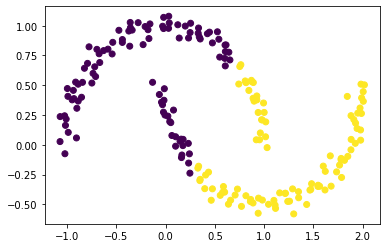

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

D_labels = KMeans(2).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=D_labels, cmap='viridis')

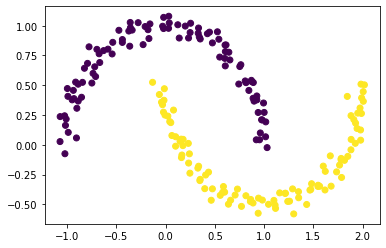

In [26]:
from sklearn.cluster import DBSCAN

D_labels = DBSCAN(eps=0.3, min_samples=15).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=D_labels, cmap='viridis')

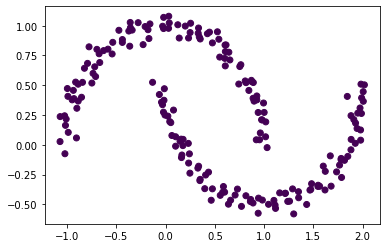

In [28]:
D_labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=D_labels, cmap='viridis')

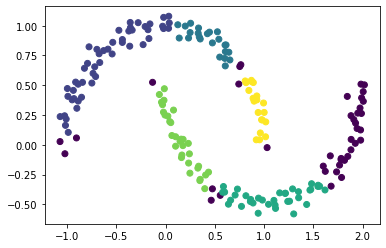

In [29]:
D_labels = DBSCAN(eps=0.3, min_samples=20).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=D_labels, cmap='viridis')

In [31]:
D_labels

array([ 4,  2,  3, -1, -1, -1,  4,  2,  4,  2,  0,  3, -1,  2,  0,  4,  1,
        3,  1,  0, -1,  2,  1,  2,  0,  3, -1, -1,  3,  1,  4,  0,  2,  3,
       -1, -1,  3,  4,  0,  3, -1,  0,  1,  3,  2,  0,  4,  0,  3,  2,  0,
        3, -1, -1,  2, -1,  1,  2,  1,  0,  3,  0, -1,  4,  2,  0,  0,  2,
        0,  0,  2,  0, -1, -1,  2,  0,  3,  4,  1,  2, -1,  0,  2, -1,  3,
        0,  4,  0,  2, -1,  1,  4, -1,  0, -1, -1, -1,  3,  0,  3,  2, -1,
        0, -1,  0,  3,  0,  0,  2,  1,  0,  0,  0,  0,  4,  2,  1, -1,  2,
       -1,  4,  0,  3,  0,  3,  0,  4,  3,  2, -1,  4,  0,  0,  3,  2, -1,
        2,  0, -1,  4,  3,  3,  1,  0,  0,  4,  3,  2,  1,  3, -1, -1,  4,
        1,  2,  0,  2,  3,  1,  1,  3,  2,  1,  2,  3, -1,  1,  2,  2,  2,
        1, -1,  0,  0,  3,  2, -1,  0,  0,  1,  2,  0, -1, -1, -1,  1,  0,
        2,  0,  0,  0,  1,  4,  4,  3,  0, -1,  3,  1, -1])

예제2

In [32]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [34]:
np.random.seed(42)

def PointsInCircum(r,n=100):
  return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),
           math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30))
            for x in range(1,n+1)]

In [35]:
df = pd.DataFrame(PointsInCircum(500,1000))
df = df.append(PointsInCircum(300,700))
df = df.append(PointsInCircum(100,300))

df = df.append([(np.random.randint(-600,600),
                 np.random.randint(-600,600))
                for i in range(300)])
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
295,-229.000000,-504.000000
296,392.000000,-580.000000
297,134.000000,525.000000
298,469.000000,-535.000000


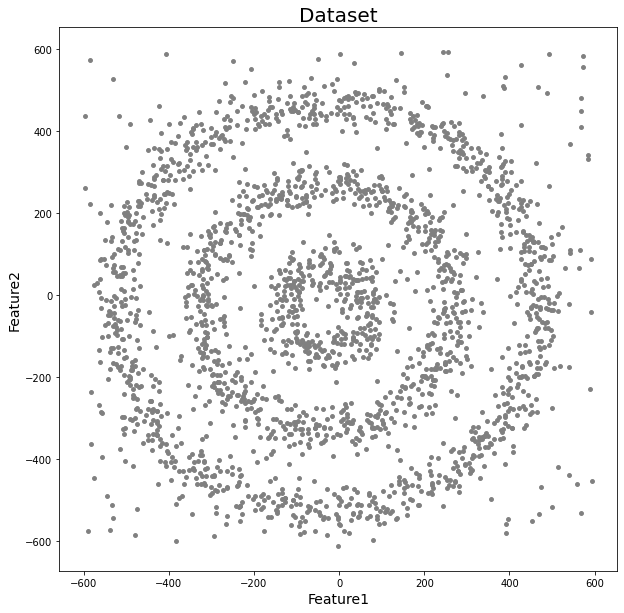

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], s=15, color='grey')
plt.title('Dataset', fontsize=20)
plt.xlabel('Feature1', fontsize=14)
plt.ylabel('Feature2', fontsize=14)
plt.show()

In [38]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4, random_state=42)
k_means.fit(df[[0,1]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

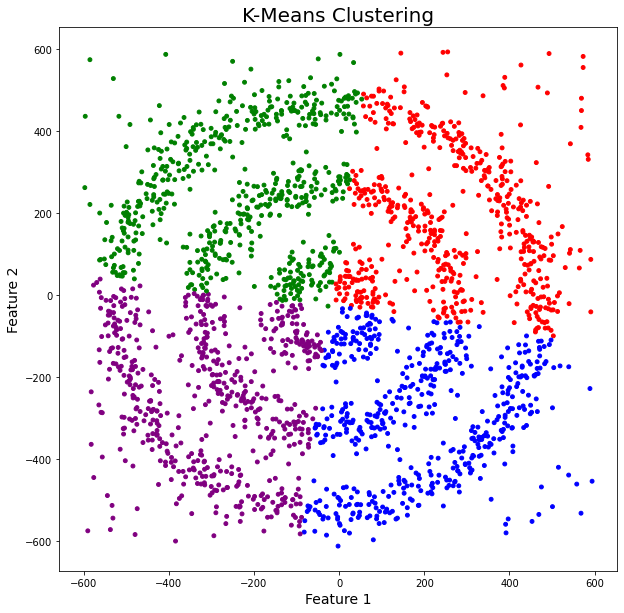

In [40]:
df['KMeans_labels']=k_means.labels_

colors=['purple', 'red', 'blue', 'green']
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], c=df['KMeans_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('K-Means Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

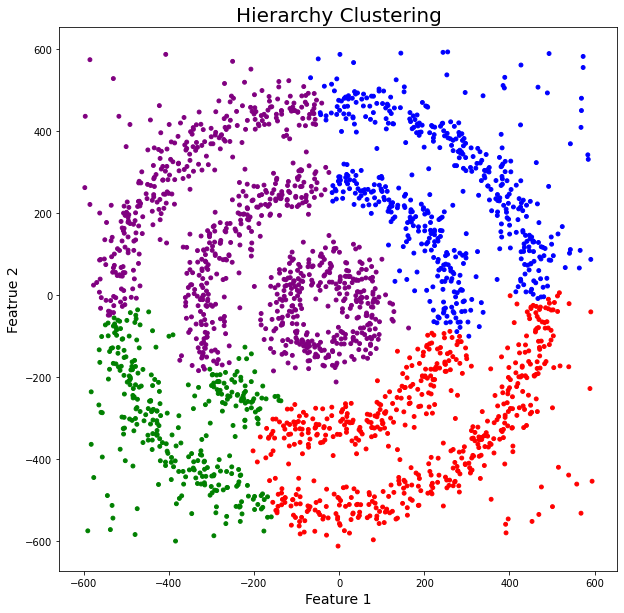

In [43]:
df['HR_labels'] = model.labels_

plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], c=df['HR_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('Hierarchy Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Featrue 2', fontsize=14)
plt.show()

예제3

In [44]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [45]:
df['DBSCAN_labels'] = dbscan.labels_
df['DBSCAN_labels'].value_counts()

-1    2300
Name: DBSCAN_labels, dtype: int64

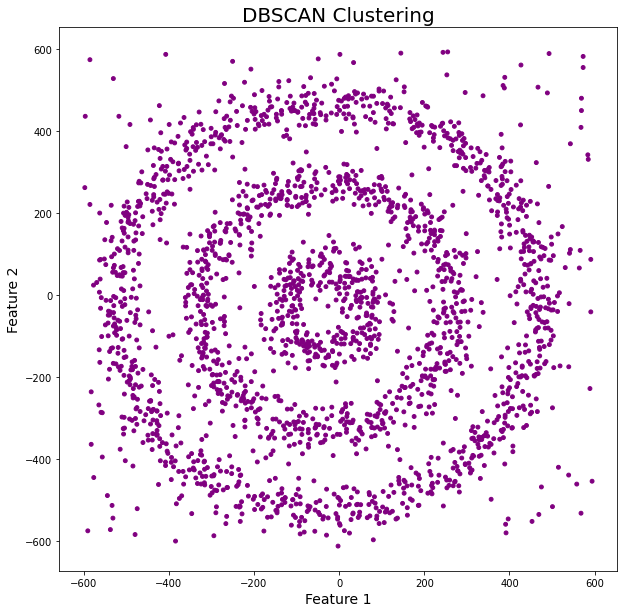

In [47]:
df['DBSCAN_labels'] = dbscan.labels_

# plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], c=df['DBSCAN_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

In [48]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

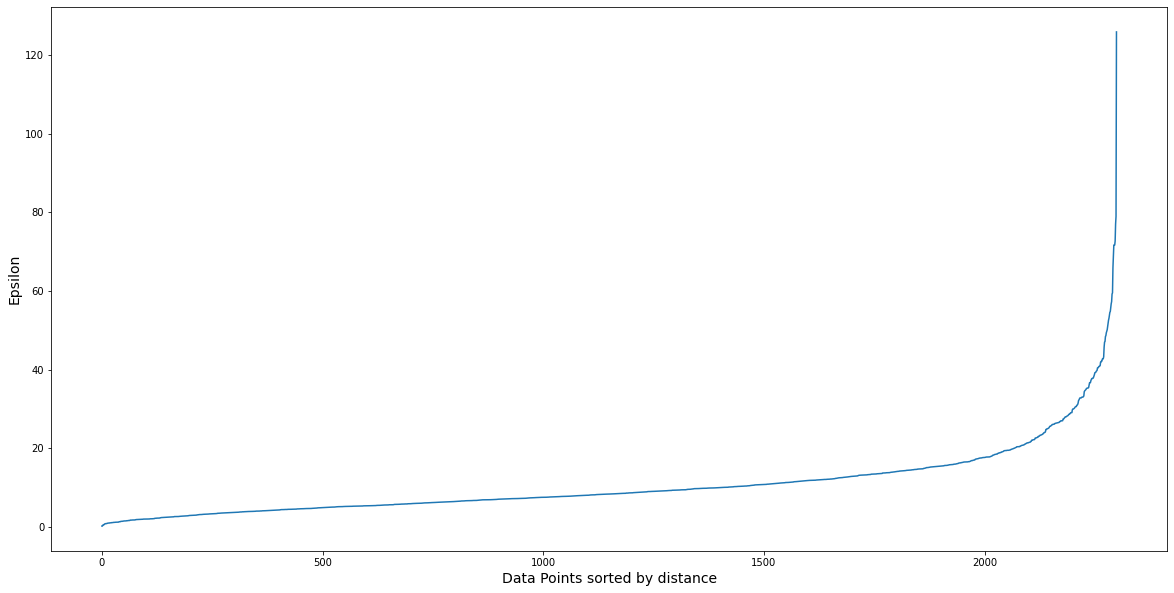

In [49]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

In [50]:
from sklearn.cluster import DBSCAN
dbscan_opt = DBSCAN(eps=30, min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=30, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [51]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

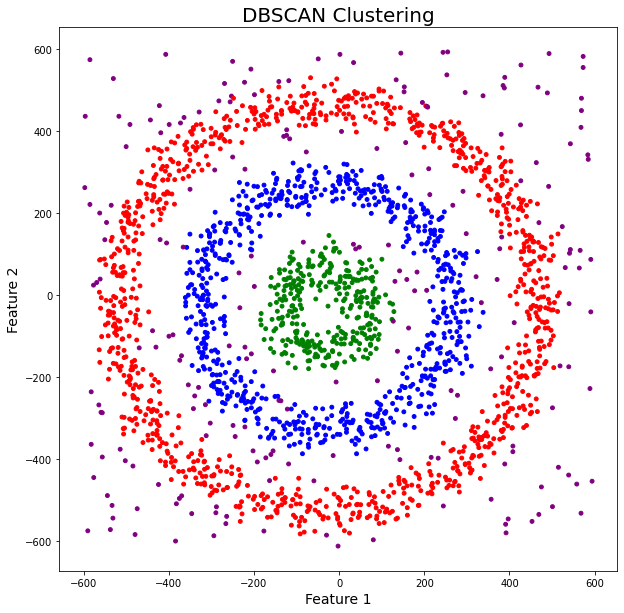

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], c=df['DBSCAN_opt_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()